In [2]:
# %pip install -q pandas numpy
# %pip install matplotlib

# %pip install tensorflow scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)

In [4]:
total_consumption_df = pd.read_csv(r"Calkowita_konsumpcja_dla_Polski/Total Load - Day Ahead _ Actual_202301010000-202401010000.csv")
sell_prices_df = pd.read_csv(r"Cena_sprzedazy_energii\PL_CENY_RYN_EN_2023.csv")
energy_production_df = pd.read_csv(r"Produkcja_energii\ninja_pv_50.1400_20.0637_corrected.csv")
consumption_profile_hourly_df = pd.read_csv(r"Profil_konsumpcji\profil_konsumpcji_godzinowo.csv")
consumption_profile_monthly_df = pd.read_csv(r"Profil_konsumpcji\profil_konsumpcji_po_miesiacu.csv")


In [5]:
total_consumption_df.head() 

,Time (CET/CEST),Day-ahead Total Load Forecast [MW] - BZN|PL,Actual Total Load [MW] - BZN|PL
0,01.01.2023 00:00 - 01.01.2023 01:00,14037.0,13272.0
1,01.01.2023 01:00 - 01.01.2023 02:00,13136.0,12509.0
2,01.01.2023 02:00 - 01.01.2023 03:00,12580.0,11845.0
3,01.01.2023 03:00 - 01.01.2023 04:00,12110.0,11462.0
4,01.01.2023 04:00 - 01.01.2023 05:00,11967.0,11454.0


In [6]:
sell_prices_df.head()

,Data,Godzina,RCE
0,20230101,1,75.01
1,20230101,2,29.43
2,20230101,3,29.05
3,20230101,4,29.26
4,20230101,5,28.94


<Axes: title={'center': 'Ceny sprzedaży energii w 2023 roku'}, xlabel='Date'>

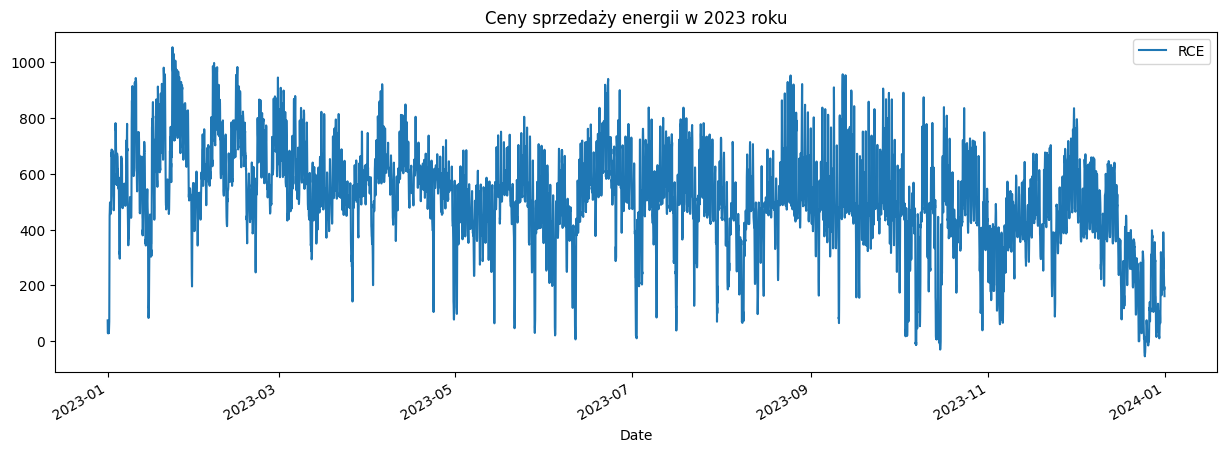

In [7]:
sell_prices_df['Date'] = pd.to_datetime(sell_prices_df['Data'].astype(str), format='%Y%m%d') + pd.to_timedelta(sell_prices_df['Godzina'] - 1, unit='h')

sell_prices_df.plot(x='Date', y='RCE', figsize=(15, 5), title='Ceny sprzedaży energii w 2023 roku')

In [8]:
energy_production_df.head()

,time,local_time,electricity
0,2019-01-01 00:00,2019-01-01 01:00,0.0
1,2019-01-01 01:00,2019-01-01 02:00,0.0
2,2019-01-01 02:00,2019-01-01 03:00,0.0
3,2019-01-01 03:00,2019-01-01 04:00,0.0
4,2019-01-01 04:00,2019-01-01 05:00,0.0


<Axes: title={'center': 'Energy Production Over Time'}, xlabel='Timestamp', ylabel='Power (kW)'>

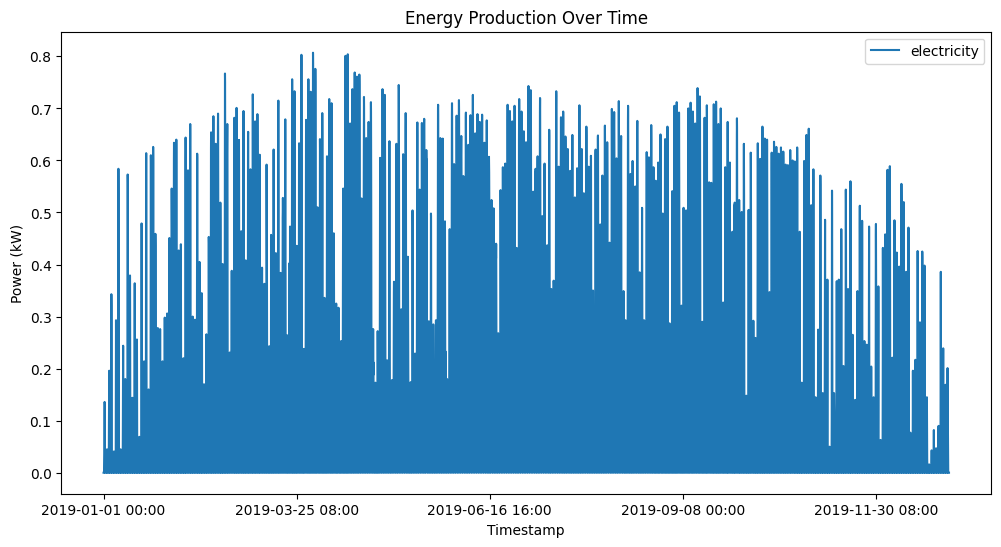

In [9]:
energy_production_df.plot(x='time', y='electricity', title='Energy Production Over Time', xlabel='Timestamp', ylabel='Power (kW)', figsize=(12, 6))

In [10]:
consumption_profile_hourly_df.head()


,Hour,Actual Total Load [%] - BZN|PL
0,00:00 - 01:00,3.546676
1,01:00 - 02:00,3.420083
2,02:00 - 03:00,3.350492
3,03:00 - 04:00,3.339817
4,04:00 - 05:00,3.377786


<Axes: title={'center': 'Monthly Consumption Profile'}, xlabel='Hour'>

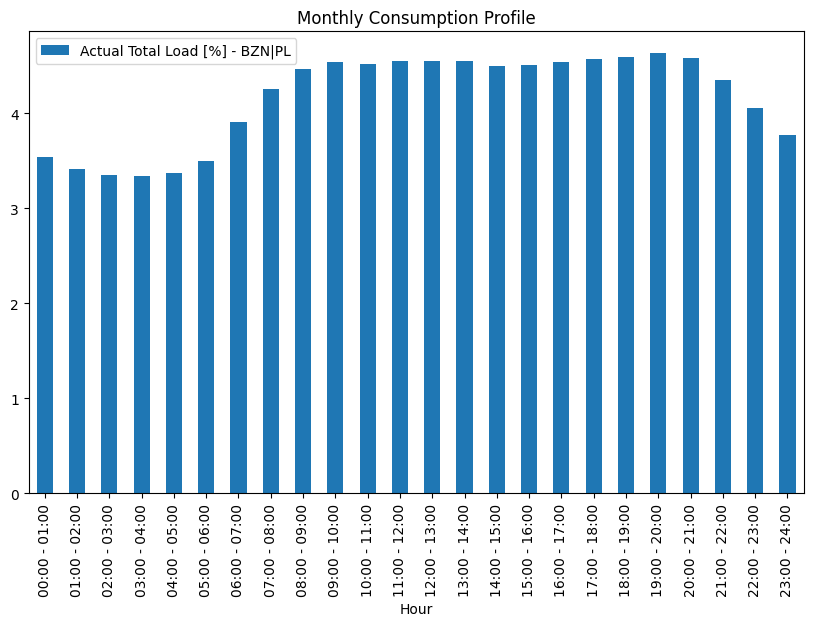

In [11]:
consumption_profile_hourly_df.plot(x='Hour', y='Actual Total Load [%] - BZN|PL', kind='bar', figsize=(10, 6), title='Monthly Consumption Profile')

In [12]:
consumption_profile_monthly_df.head()  


,Month,Actual Total Load [%] - BZN|PL
0,2023-01,9.087080
1,2023-02,8.410362
2,2023-03,8.963658
3,2023-04,7.946352
4,2023-05,7.777572


<Axes: title={'center': 'Monthly Consumption Profile'}, xlabel='Month'>

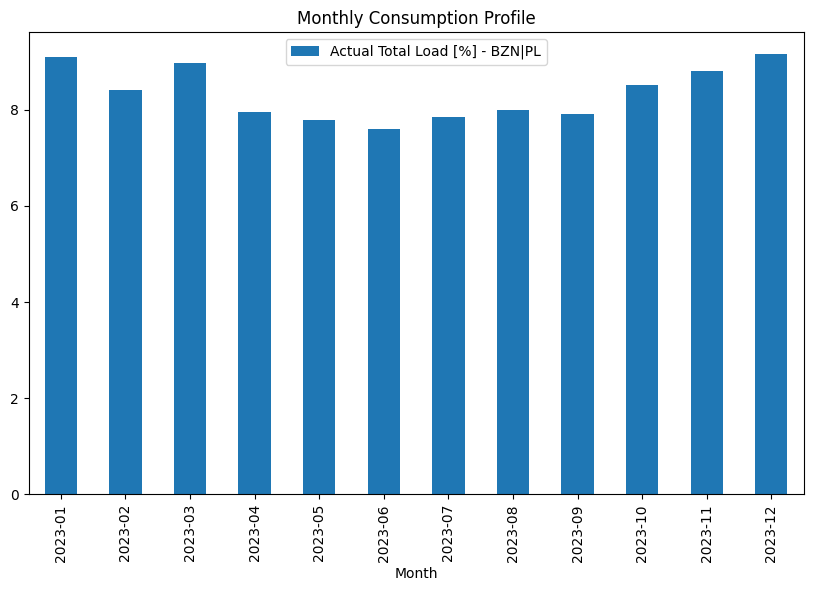

In [13]:
consumption_profile_monthly_df.plot(x='Month', y='Actual Total Load [%] - BZN|PL', kind='bar', figsize=(10, 6), title='Monthly Consumption Profile')

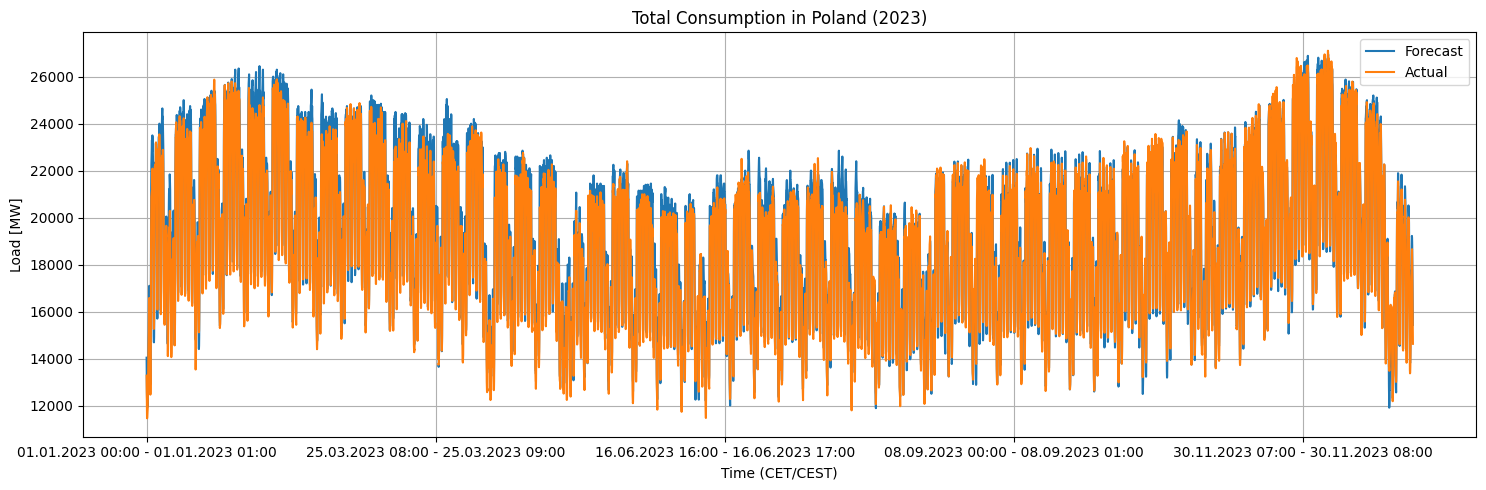

In [14]:
total_consumption_df.plot(
    x='Time (CET/CEST)',
    y=['Day-ahead Total Load Forecast [MW] - BZN|PL', 'Actual Total Load [MW] - BZN|PL'],
    figsize=(15, 5),
    title='Total Consumption in Poland (2023)'
)

plt.xlabel('Time (CET/CEST)')
plt.ylabel('Load [MW]')
plt.legend(['Forecast', 'Actual'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\Julia\AppData\Local\Temp\ipykernel_14524\2142087679.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').agg({


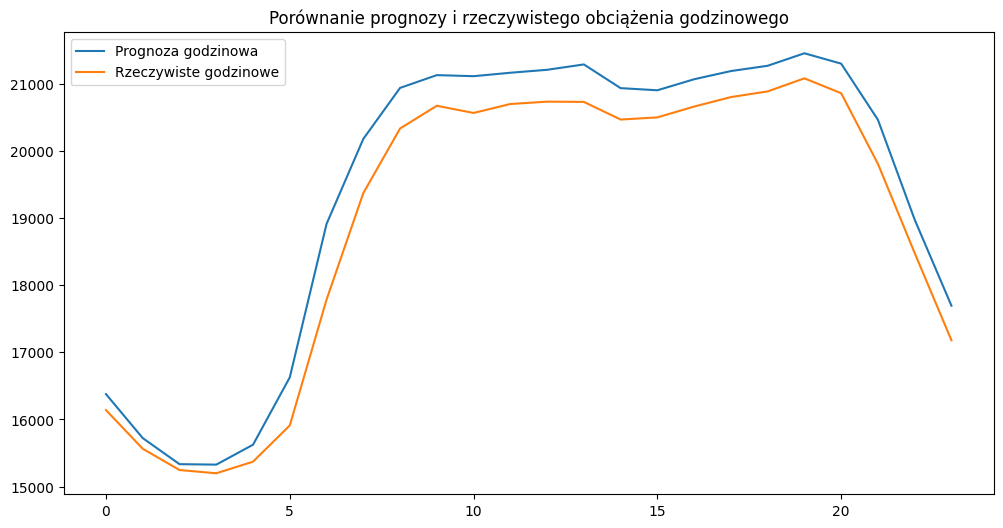

Średni błąd absolutny (MAE) dla danych godzinowych: 464.80513698630165
Średni błąd absolutny (MAE) dla danych dziennych: 522.1896446297399
Średni błąd absolutny (MAE) dla danych miesięcznych: 466.34647720492376


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych
data = pd.read_csv(r'Calkowita_konsumpcja_dla_Polski\Total Load - Day Ahead _ Actual_202301010000-202401010000.csv')

# Konwersja kolumny czasu
data['Time (CET/CEST)'] = pd.to_datetime(data['Time (CET/CEST)'].str.split(' - ').str[0], format='%d.%m.%Y %H:%M')
data.set_index('Time (CET/CEST)', inplace=True)

# Dodanie kolumn pomocniczych
data['Hour'] = data.index.hour
data['Day'] = data.index.day
data['Month'] = data.index.month

# Agregacja godzinowa
hourly_data = data.groupby('Hour').agg({
    'Day-ahead Total Load Forecast [MW] - BZN|PL': 'mean',
    'Actual Total Load [MW] - BZN|PL': 'mean'
})

# Agregacja dzienna
daily_data = data.resample('D').agg({
    'Day-ahead Total Load Forecast [MW] - BZN|PL': 'mean',
    'Actual Total Load [MW] - BZN|PL': 'mean'
})

# Agregacja miesięczna
monthly_data = data.resample('M').agg({
    'Day-ahead Total Load Forecast [MW] - BZN|PL': 'mean',
    'Actual Total Load [MW] - BZN|PL': 'mean'
})

# Obliczenie błędów
hourly_data['Error'] = hourly_data['Day-ahead Total Load Forecast [MW] - BZN|PL'] - hourly_data['Actual Total Load [MW] - BZN|PL']
daily_data['Error'] = daily_data['Day-ahead Total Load Forecast [MW] - BZN|PL'] - daily_data['Actual Total Load [MW] - BZN|PL']
monthly_data['Error'] = monthly_data['Day-ahead Total Load Forecast [MW] - BZN|PL'] - monthly_data['Actual Total Load [MW] - BZN|PL']

# Wizualizacja
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data['Day-ahead Total Load Forecast [MW] - BZN|PL'], label='Prognoza godzinowa')
plt.plot(hourly_data.index, hourly_data['Actual Total Load [MW] - BZN|PL'], label='Rzeczywiste godzinowe')
plt.legend()
plt.title('Porównanie prognozy i rzeczywistego obciążenia godzinowego')
plt.show()

# Wybór najlepszej opcji na podstawie MAE
mae_hourly = hourly_data['Error'].abs().mean()
mae_daily = daily_data['Error'].abs().mean()
mae_monthly = monthly_data['Error'].abs().mean()

print(f'Średni błąd absolutny (MAE) dla danych godzinowych: {mae_hourly}')
print(f'Średni błąd absolutny (MAE) dla danych dziennych: {mae_daily}')
print(f'Średni błąd absolutny (MAE) dla danych miesięcznych: {mae_monthly}')

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from sklearn.model_selection import train_test_split

# Wczytanie danych
df = pd.read_csv(r'Cena_sprzedazy_energii\PL_CENY_RYN_EN_2023.csv', parse_dates=['Data'])
df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
df = df.sort_values('Data')

# Agregacja do danych dziennych (średnia cena dzienna)
daily_df = df.groupby('Data')['RCE'].mean().reset_index()
daily_df.columns = ['ds', 'y']

# Podział na zbiór treningowy i testowy
train_size = int(len(daily_df) * 0.8)
train, test = daily_df.iloc[:train_size], daily_df.iloc[train_size:]

## 1. Model SARIMA
def evaluate_sarima(train, test, order=(1,1,1), seasonal_order=(1,2,1,24)):
    model = SARIMAX(train['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    predictions = model_fit.forecast(steps=len(test))
    mae = mean_absolute_error(test['y'], predictions)
    rmse = np.sqrt(mean_squared_error(test['y'], predictions))
    return mae, rmse, predictions

# Przykładowe wywołanie (należy dostroić parametry)
sarima_mae, sarima_rmse, sarima_preds = evaluate_sarima(train, test)


## 3. Model LSTM
def prepare_lstm_data(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_df[['y']])

n_steps = 7
X, y = prepare_lstm_data(scaled_data, n_steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, verbose=0)

lstm_preds = model.predict(X_test)
lstm_preds = scaler.inverse_transform(lstm_preds)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

lstm_mae = mean_absolute_error(y_test_inv, lstm_preds)
lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, lstm_preds))


c:\Users\Julia\Desktop\Dane\Dane\Rozszerzony__kalkulator\Uzycie_danych_godzinowych\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Julia\Desktop\Dane\Dane\Rozszerzony__kalkulator\Uzycie_danych_godzinowych\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Julia\Desktop\Dane\Dane\Rozszerzony__kalkulator\Uzycie_danych_godzinowych\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


Epoch 1/20


c:\Users\Julia\Desktop\Dane\Dane\Rozszerzony__kalkulator\Uzycie_danych_godzinowych\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3907
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2642 
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1302 
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0396 
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0216 
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0132 
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0163 
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0135 
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0151 
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0155 
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

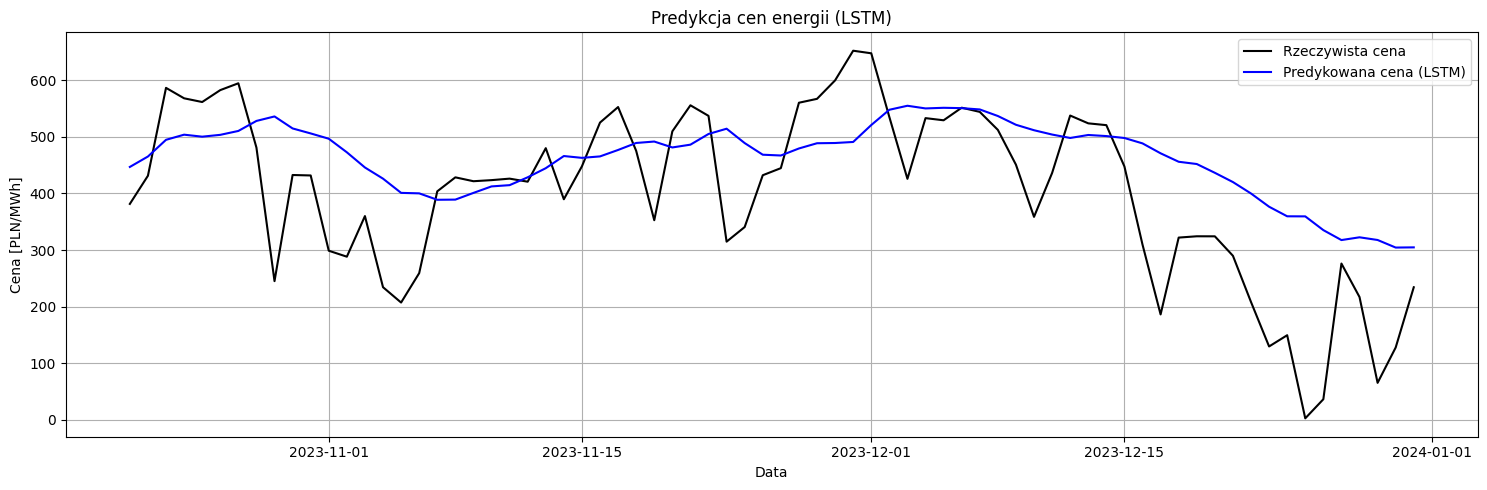

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Wczytanie i przygotowanie danych ===
df = pd.read_csv('Cena_sprzedazy_energii/PL_CENY_RYN_EN_2023.csv', parse_dates=['Data'])
df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
df = df.sort_values('Data')

# Średnia dzienna cena
daily_df = df.groupby('Data')['RCE'].mean().reset_index()
daily_df.columns = ['ds', 'y']

# === 2. Skalowanie cen ===
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(daily_df[['y']])

# === 3. Tworzenie sekwencji do LSTM ===
def create_sequences(data, n_steps=7):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 7
X, y = create_sequences(scaled_prices, n_steps)

# === 4. Podział na zbiór treningowy/testowy ===
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# === 5. Model LSTM ===
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, verbose=1)

# === 6. Predykcja i odwrócenie skalowania ===
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# === 7. Ocena ===
mae = mean_absolute_error(y_test_inv, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# === 8. Wykres ===
# Odpowiadające daty
test_dates = daily_df['ds'].iloc[-len(y_test):]

plt.figure(figsize=(15, 5))
plt.plot(test_dates, y_test_inv, label='Rzeczywista cena', color='black')
plt.plot(test_dates, y_pred, label='Predykowana cena (LSTM)', color='blue')
plt.title('Predykcja cen energii (LSTM)')
plt.xlabel('Data')
plt.ylabel('Cena [PLN/MWh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


SARIMA MAE: 114.79, RMSE: 137.91


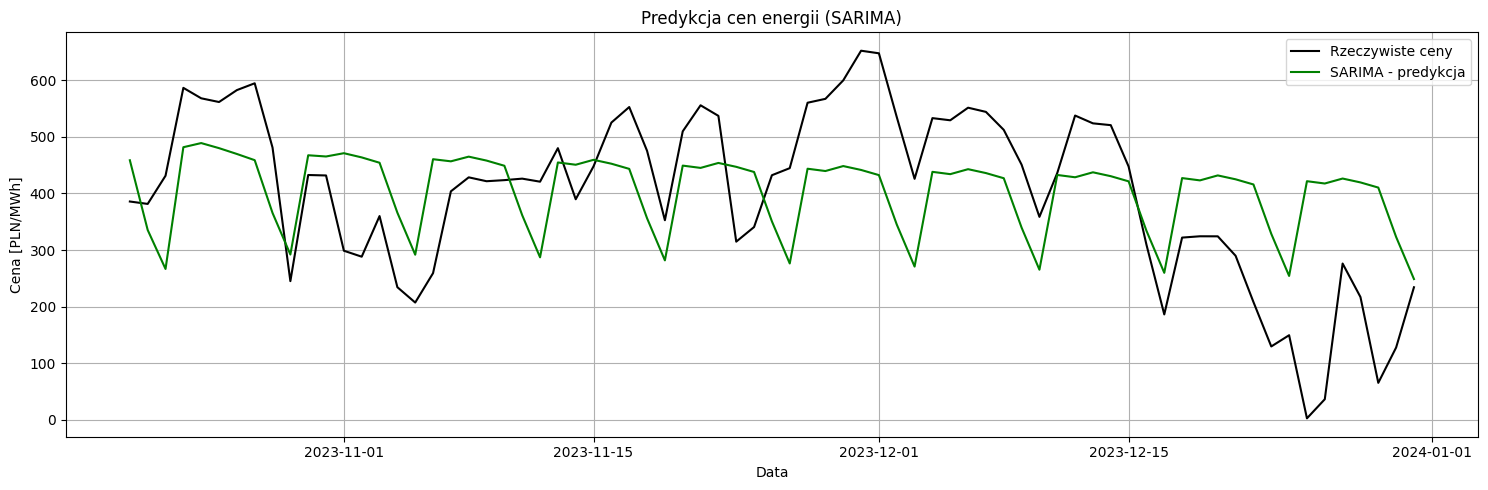

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Wczytanie danych (jeśli jeszcze nie wczytane) ===
df = pd.read_csv('Cena_sprzedazy_energii/PL_CENY_RYN_EN_2023.csv', parse_dates=['Data'])
df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
df = df.sort_values('Data')

# Średnia dzienna cena
daily_df = df.groupby('Data')['RCE'].mean().reset_index()
daily_df.columns = ['ds', 'y']

# === 2. Podział na zbiór treningowy/testowy ===
train_size = int(len(daily_df) * 0.8)
train, test = daily_df.iloc[:train_size], daily_df.iloc[train_size:]

# === 3. Dopasowanie modelu SARIMA ===
# Parametry SARIMA (należy dobrać lepiej np. przez grid search/AIC)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)  # tygodniowa sezonowość (dla danych dziennych)

model = SARIMAX(train['y'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# === 4. Prognoza ===
n_test = len(test)
sarima_preds = model_fit.forecast(steps=n_test)

# === 5. Ocena modelu ===
mae = mean_absolute_error(test['y'], sarima_preds)
rmse = np.sqrt(mean_squared_error(test['y'], sarima_preds))
print(f"SARIMA MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# === 6. Wykres ===
plt.figure(figsize=(15, 5))
plt.plot(test['ds'], test['y'], label='Rzeczywiste ceny', color='black')
plt.plot(test['ds'], sarima_preds, label='SARIMA - predykcja', color='green')
plt.title('Predykcja cen energii (SARIMA)')
plt.xlabel('Data')
plt.ylabel('Cena [PLN/MWh]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Generowanie przykładowych danych zużycia energetycznego (jeśli nie mamy własnych)
np.random.seed(42)
date_range = pd.date_range(start='2010-01-01', end='2023-12-31', freq='M')
energy_consumption = 100 + 2 * np.arange(len(date_range)) + 10 * np.sin(
    np.arange(len(date_range)) * 0.5) + np.random.normal(0, 5, len(date_range))
data = pd.read_csv(r"Calkowita_konsumpcja_dla_Polski\Total Load - Day Ahead _ Actual_202301010000-202401010000.csv")
data.set_index('Date', inplace=True)

# Podział na zbiór treningowy i testowy
train = data.iloc[:-24]  # pierwsze N-24 miesiące jako treningowe
test = data.iloc[-24:]  # ostatnie 24 miesiące jako testowe

# Wizualizacja danych
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Energy_Consumption'], label='Trening')
plt.plot(test.index, test['Energy_Consumption'], label='Test')
plt.title('Zużycie energetyczne w czasie')
plt.xlabel('Data')
plt.ylabel('Zużycie')
plt.legend()
plt.grid()
plt.show()


# Test stacjonarności
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('Test ADF:')
    print(f'Statystyka ADF: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Wartości krytyczne:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    return result[1] > 0.05  # zwraca True jeśli szereg jest niestacjonarny


print("\nTest stacjonarności dla danych treningowych:")
non_stationary = test_stationarity(train['Energy_Consumption'])

if non_stationary:
    print("\nSzereg jest niestacjonarny - różnicowanie może być potrzebne.")
    # Różnicowanie
    train['Energy_diff'] = train['Energy_Consumption'].diff()
    train = train.dropna(subset=['Energy_diff'])  # usuwa tylko wiersze, gdzie 'Energy_diff' to NaN

    print("\nTest stacjonarności po różnicowaniu:")
    if test_stationarity(train['Energy_diff']):
        print("Szereg nadal niestacjonarny - potrzebne kolejne różnicowanie")
    else:
        print("Szereg jest teraz stacjonarny")
else:
    print("\nSzereg jest stacjonarny - można przejść do modelowania")

# Wykresy ACF i PACF do identyfikacji parametrów
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(train['Energy_Consumption'].dropna(), ax=plt.gca(), lags=24)
plt.subplot(212)
plot_pacf(train['Energy_Consumption'].dropna(), ax=plt.gca(), lags=24)
plt.tight_layout()
plt.show()


# Funkcja do ewaluacji modelu
def evaluate_model(model, train_data, test_data, order, seasonal_order=None):
    history = train_data.copy()
    predictions = []

    if seasonal_order:  # Dla SARIMA
        fitted_model = model(history['Energy_Consumption'],
                             order=order,
                             seasonal_order=seasonal_order,
                             enforce_stationarity=False,
                             enforce_invertibility=False).fit()
    else:  # Dla pozostałych modeli
        fitted_model = model(history['Energy_Consumption'],
                             order=order).fit()

    # Prognoza
    forecast = fitted_model.get_forecast(steps=len(test_data))
    predictions = forecast.predicted_mean
    conf_int = forecast.conf_int()

    # Obliczenie błędów
    mse = mean_squared_error(test_data['Energy_Consumption'], predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(test_data['Energy_Consumption'], predictions)

    # Wizualizacja
    plt.figure(figsize=(12, 6))
    plt.plot(train_data.index, train_data['Energy_Consumption'], label='Trening')
    plt.plot(test_data.index, test_data['Energy_Consumption'], label='Test')
    plt.plot(test_data.index, predictions, label='Prognoza')
    plt.fill_between(test_data.index,
                     conf_int.iloc[:, 0],
                     conf_int.iloc[:, 1],
                     color='k', alpha=0.1)
    plt.title(f'Prognoza vs Rzeczywiste wartości (RMSE={rmse:.2f}, MAE={mae:.2f})')
    plt.legend()
    plt.grid()
    plt.show()

    print(f"\nRMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")

    return fitted_model, predictions, rmse, mae


# 1. Model AR (Autoregresyjny)
print("\n=== Model AR ===")
ar_order = (2, 0, 0)  # (p, d, q)
ar_model, ar_pred, ar_rmse, ar_mae = evaluate_model(ARIMA, train, test, ar_order)

# 2. Model MA (Średniej ruchomej)
print("\n=== Model MA ===")
ma_order = (0, 0, 2)  # (p, d, q)
ma_model, ma_pred, ma_rmse, ma_mae = evaluate_model(ARIMA, train, test, ma_order)

# 3. Model ARMA (Autoregresyjna średnia ruchoma)
print("\n=== Model ARMA ===")
arma_order = (2, 0, 2)  # (p, d, q)
arma_model, arma_pred, arma_rmse, arma_mae = evaluate_model(ARIMA, train, test, arma_order)

# 4. Model ARIMA (Autoregresyjne zintegrowana średnia ruchoma)
print("\n=== Model ARIMA ===")
arima_order = (2, 1, 2)  # (p, d, q)
arima_model, arima_pred, arima_rmse, arima_mae = evaluate_model(ARIMA, train, test, arima_order)

# 5. Model SARIMA (Sezonowa ARIMA)
print("\n=== Model SARIMA ===")
sarima_order = (1, 1, 1)  # (p, d, q)
sarima_seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s) gdzie s=12 dla danych miesięcznych
sarima_model, sarima_pred, sarima_rmse, sarima_mae = evaluate_model(
    SARIMAX, train, test, sarima_order, sarima_seasonal_order)

# Porównanie modeli
results = pd.DataFrame({
    'Model': ['AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA'],
    'RMSE': [ar_rmse, ma_rmse, arma_rmse, arima_rmse, sarima_rmse],
    'MAE': [ar_mae, ma_mae, arma_mae, arima_mae, sarima_mae]
})

print("\nPorównanie wyników wszystkich modeli:")
print(results.sort_values(by='RMSE'))

# Wybór najlepszego modelu
best_model = results.loc[results['RMSE'].idxmin(), 'Model']
print(f"\nNajlepszy model: {best_model}")

# Prognoza na przyszłość używając najlepszego modelu
if best_model == 'SARIMA':
    final_model = SARIMAX(data['Energy_Consumption'],
                          order=sarima_order,
                          seasonal_order=sarima_seasonal_order).fit()
else:
    final_model = ARIMA(data['Energy_Consumption'],
                        order=eval(f"{best_model.lower()}_order")).fit()

# Prognoza na kolejne 12 okresów
forecast = final_model.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Wizualizacja prognozy
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Energy_Consumption'], label='Dane historyczne')
plt.plot(forecast_mean.index, forecast_mean, label='Prognoza')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1],
                 color='k', alpha=0.1)
plt.title(f'Prognoza zużycia energetycznego na kolejne 12 okresów ({best_model} model)')
plt.xlabel('Data')
plt.ylabel('Zużycie energetyczne')
plt.legend()
plt.grid()
plt.show()

<Axes: title={'center': 'Energy Production Over Time'}, xlabel='Timestamp', ylabel='Power (kW)'>

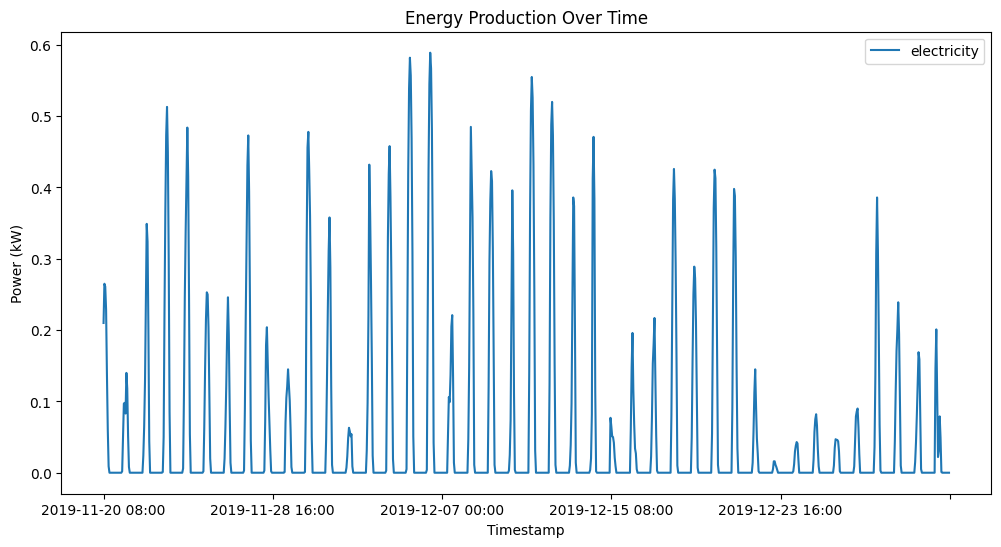

In [61]:
energy_production_df[-1000:].plot(x='time', y='electricity', title='Energy Production Over Time', xlabel='Timestamp', ylabel='Power (kW)', figsize=(12, 6))

<Axes: title={'center': 'Energy Production Over Time'}, xlabel='Timestamp', ylabel='Power (kW)'>

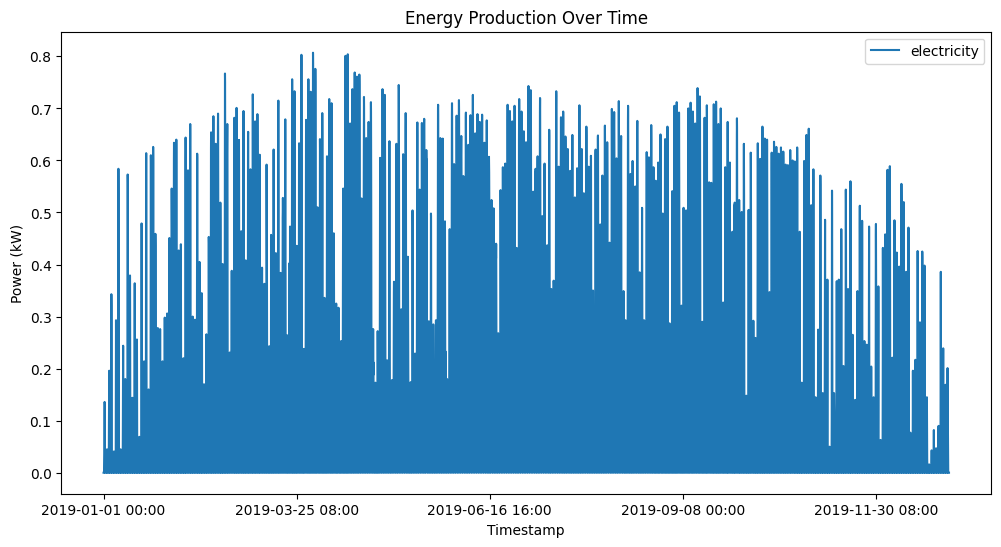

In [37]:
energy_production_df.plot(x='time', y='electricity', title='Energy Production Over Time', xlabel='Timestamp', ylabel='Power (kW)', figsize=(12, 6))

<Axes: title={'center': 'Ceny sprzedaży energii w 2023 roku'}, xlabel='Date'>

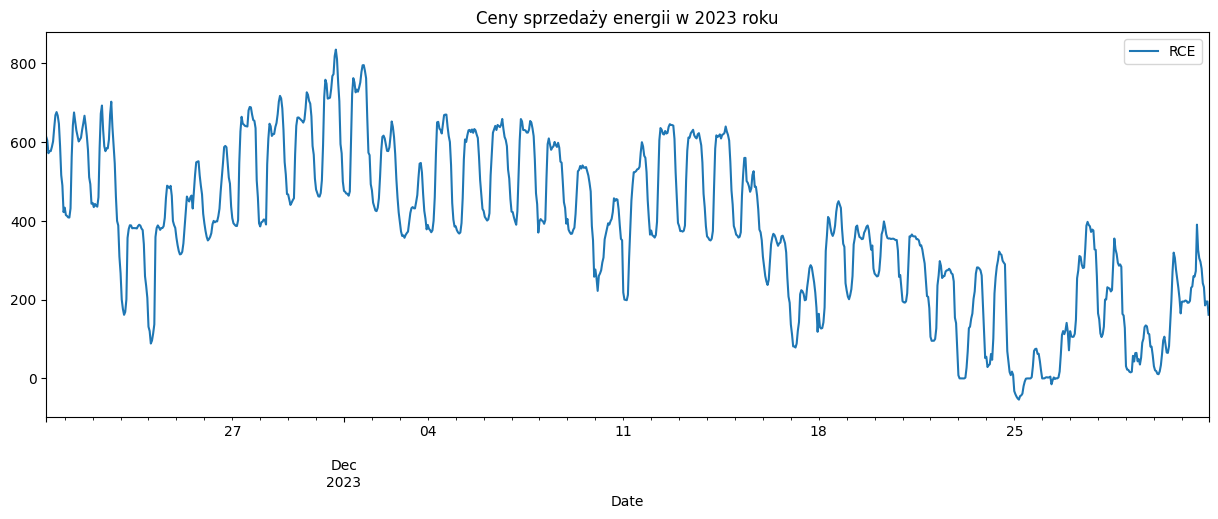

In [36]:
sell_prices_df[-1000:].plot(x='Date', y='RCE', figsize=(15, 5), title='Ceny sprzedaży energii w 2023 roku')

In [ ]:
df = pd.DataFrame({
    'Energy_Production': energy_production_df[-3000:]['electricity'].values,
    'Energy_Price': sell_prices_df[-3000:]['RCE'].values,
    'Energy_Usage': [0.5] * 3000,
})

df

ModuleNotFoundError: No module named 'torch'

c:\Users\Julia\Desktop\NEW\Kosciuszkon-2025\backend\seasonal_data\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


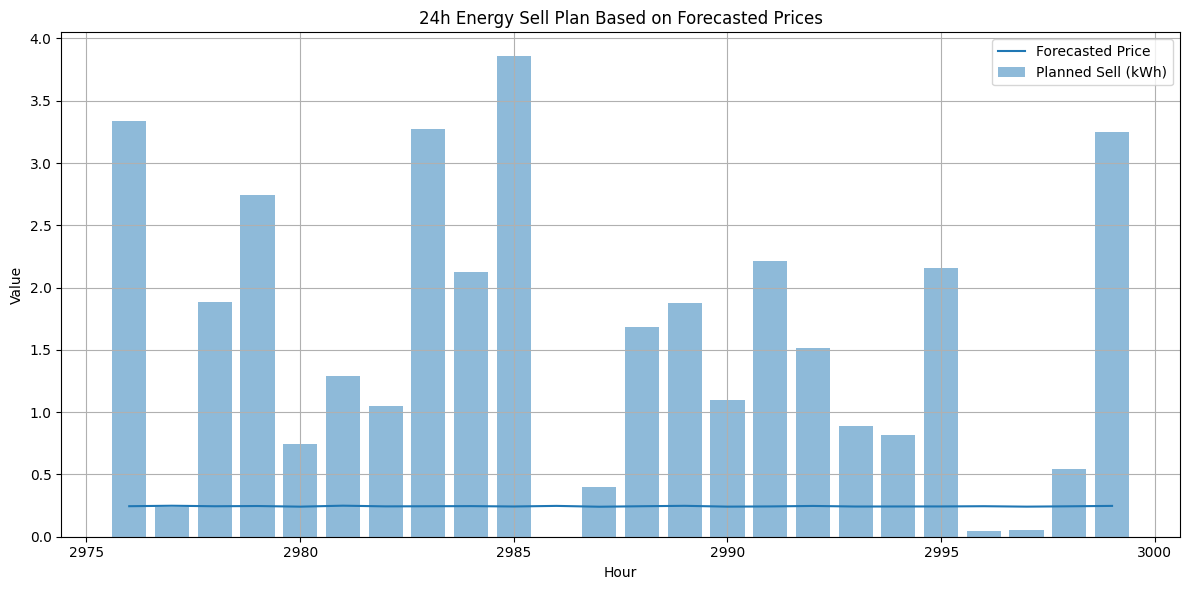

np.float64(9.083153627504842)

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Simulate input DataFrame structure (3000 hourly records)
np.random.seed(42)
n = 3000
df = pd.DataFrame({
    'Energy_Production': np.random.uniform(1.5, 5.0, n),
    'Energy_Usage': np.random.uniform(1.0, 3.0, n),
    'Energy_Price': np.random.uniform(0.1, 0.4, n)
})
df['Excess_Energy'] = df['Energy_Production'] - df['Energy_Usage']
df['Excess_Energy'] = df['Excess_Energy'].clip(lower=0)  # no negative sellable energy

# Normalize prices
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(df[['Energy_Price']])

# Create sequences for LSTM
SEQ_LENGTH = 72  # past 72 hours
FORECAST_HORIZON = 24  # next 24 hours

def create_sequences(data, seq_len, horizon):
    X, y = [], []
    for i in range(len(data) - seq_len - horizon):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len:i+seq_len+horizon].flatten())
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_prices, SEQ_LENGTH, FORECAST_HORIZON)

# Train-test split
split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Build LSTM model in TensorFlow
model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)),
    Dense(FORECAST_HORIZON)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)

# Forecast next 24h prices
last_seq = scaled_prices[-SEQ_LENGTH:].reshape(1, SEQ_LENGTH, 1)
forecast_scaled = model.predict(last_seq)[0]
forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()

# Create sell plan
next_day = df.iloc[-24:].copy()
next_day['Forecasted_Price'] = forecast
next_day['Sell'] = next_day['Excess_Energy']
sell_plan = next_day.sort_values(by='Forecasted_Price', ascending=False)
sell_plan['Sell_Plan'] = np.minimum(sell_plan['Sell'], sell_plan['Excess_Energy'])

# Sort chronologically
sell_plan = sell_plan.sort_index()

# Plot forecast and plan
plt.figure(figsize=(12, 6))
plt.plot(next_day.index, next_day['Forecasted_Price'], label='Forecasted Price')
plt.bar(next_day.index, sell_plan['Sell_Plan'], alpha=0.5, label='Planned Sell (kWh)')
plt.title('24h Energy Sell Plan Based on Forecasted Prices')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate estimated total profit
total_profit = (sell_plan['Sell_Plan'] * sell_plan['Forecasted_Price']).sum()
total_profit

